Giải thích đơn giản, dễ hiểu về các **bảng**, **fields** và **mối quan hệ**:

---

## Các nhóm bảng chính:
Schemas này thuộc dạng mô hình Data Warehouse (lưu trữ dữ liệu để phân tích, báo cáo kinh doanh). Các bảng được chia thành 2 nhóm chính:

### 1. **Dimension Tables (Bảng chiều):**
Là những bảng lưu các thuộc tính, thông tin bổ sung về các thực thể như khách hàng, địa điểm, thời gian, sản phẩm…

Ví dụ một số bảng chiều tiêu biểu:

- **customer_address:** Chứa thông tin địa chỉ của khách hàng như số nhà, đường, thành phố, bang, quốc gia.
- **customer_demographics:** Chứa thông tin nhân khẩu học của khách hàng (giới tính, tình trạng hôn nhân, giáo dục, thu nhập dự đoán).
- **household_demographics:** Lưu thông tin về nhân khẩu học của hộ gia đình (thu nhập, số người phụ thuộc, v.v.).
- **date_dim:** Bảng chiều ngày, cung cấp chi tiết ngày như ngày, tuần, quý, năm, ngày lễ, ngày cuối tuần, ngày nghỉ, v.v.
- **time_dim:** Bảng chiều thời gian (giờ, phút, giây, ca làm việc).
- **customer_address:** Địa chỉ chi tiết của khách hàng.
- **warehouse:** Thông tin về các kho hàng, vị trí kho.
- **store:** Thông tin về các cửa hàng bán lẻ.
- **call_center:** Thông tin các trung tâm cuộc gọi, bộ phận chăm sóc khách hàng.
- **web_site:** Thông tin về các website bán hàng trực tuyến.
- **reason:** Các lý do hoàn trả hàng.
- **ship_mode:** Chế độ vận chuyển (nhà vận chuyển, hợp đồng).
- **income_band:** Các khoảng thu nhập để nhóm khách hàng theo thu nhập.
- **promotion:** Các chương trình khuyến mãi.

### 2. **Fact Tables (Bảng sự kiện):**
Chứa các sự kiện hoặc giao dịch kinh doanh như bán hàng, trả hàng, tồn kho, doanh thu.

Bao gồm các bảng:

- **store_sales:** Giao dịch bán hàng tại cửa hàng.
- **catalog_sales:** Giao dịch bán hàng qua catalog (danh mục sản phẩm).
- **web_sales:** Giao dịch bán hàng qua trang web trực tuyến.
- **store_returns:** Thông tin về các sản phẩm bị trả lại tại cửa hàng.
- **catalog_returns:** Thông tin về trả hàng qua catalog.
- **web_returns:** Trả hàng trên web.
- **inventory:** Thông tin về tồn kho sản phẩm.
- **web_page:** Các trang web cụ thể người dùng truy cập.
- **promotion:** Các chương trình khuyến mãi.

---

## **Giải thích các trường (field) quan trọng:**

### **Chung:**

- Các trường có hậu tố `_sk` (ví dụ: `customer_sk`, `store_sk`):
  - Đây là khoá tổng hợp (**surrogate key**), được tạo ra tự động làm khóa chính (primary key).
- Các trường có hậu tố `_id` (ví dụ: `customer_id`): Thường là mã định danh tự nhiên hoặc mã hệ thống.
- `_sk`: (Surrogate Key) Là khóa chính dùng để join các bảng với nhau.

---

### **Ví dụ một số trường cụ thể:**

- **customer_address**
  - `ca_address_sk`: ID tự sinh của địa chỉ (khóa chính).
  - `ca_city`, `ca_state`, `ca_zip`: Thông tin địa chỉ cụ thể.

- **customer_demographics**
  - `cd_gender`: giới tính (M/F).
  - `cd_marital_status`: Tình trạng hôn nhân.
  - `cd_education_status`: Trình độ học vấn.

- **date_dim**
  - `d_date_sk`: Khóa chính ngày.
  - `d_date`: Ngày thực tế.
  - `d_year`, `d_month_seq`, `d_quarter_seq`: Các chuỗi thời gian để phân tích xu hướng.

- **store_sales**
  - `ss_sold_date_sk`: Liên kết đến ngày bán (date_dim).
  - `ss_item_sk`: Khóa sản phẩm được bán.
  - `ss_quantity`: Số lượng bán ra.
  - `ss_sales_price`, `ss_net_profit`: Giá bán, lợi nhuận thu về.

---

## **Mối quan hệ giữa các bảng (Relations):**

Các bảng được liên kết thông qua các **khóa ngoại** (`foreign key`), ví dụ:

- **store_sales** liên kết với các bảng:
  - `ss_item_sk` → **item**
  - `ss_customer_sk` → **customer**
  - `ss_store_sk` → `store (s_store_sk)`
  - `ss_sold_date_sk` → `date_dim` (thời gian giao dịch)
  - `ss_promo_sk` → chương trình khuyến mãi (promotion)

- **customer** liên kết với:
  - `c_current_addr_sk` → `customer_address`
  - `c_current_cdemo_sk` → `customer_demographics`
  - `c_current_hdemo_sk` → `household_demographics`

- Các bảng khác như **web_sales**, **catalog_sales**, **inventory** đều sử dụng các dimension tương tự để lưu thông tin về khách hàng, sản phẩm, thời gian, địa chỉ, lý do trả hàng, v.v.

---

## **Ý nghĩa thực tế của mô hình:**

Đây là một schemas thường dùng trong Data Warehouse, giúp:

- **Phân tích hiệu quả bán hàng:** Theo từng cửa hàng, website, catalog.
- **Phân tích hành vi khách hàng:** Phân loại khách hàng, thu nhập, trình độ học vấn.
- **Quản lý hàng tồn kho:** Xác định vị trí kho hàng, lượng tồn kho.
- **Hiệu quả của chương trình khuyến mãi:** Đo lường kết quả chương trình khuyến mãi.
- **Phân tích theo thời gian:** Theo quý, tháng, tuần, ngày, giờ.

---

**Tổng kết**:  
Mô hình này là một dạng mô hình kho dữ liệu (data warehouse) theo chuẩn mô hình Star Schema (bảng chiều - bảng sự kiện). Nó giúp doanh nghiệp dễ dàng thực hiện phân tích dữ liệu, báo cáo kinh doanh, từ đó đưa ra các quyết định kinh doanh hiệu quả hơn.

Sơ đồ ER trên thể hiện mô hình dữ liệu của một hệ thống bán hàng, bao gồm các thông tin chính như khách hàng, địa chỉ khách hàng, thông tin sản phẩm, tồn kho, các phương thức bán hàng (cửa hàng, web, catalog), cùng với các mối quan hệ giữa những thực thể này. Các chú thích tiếng Việt đã làm rõ hơn về nội dung và mối quan hệ giữa các thực thể trong hệ thống.

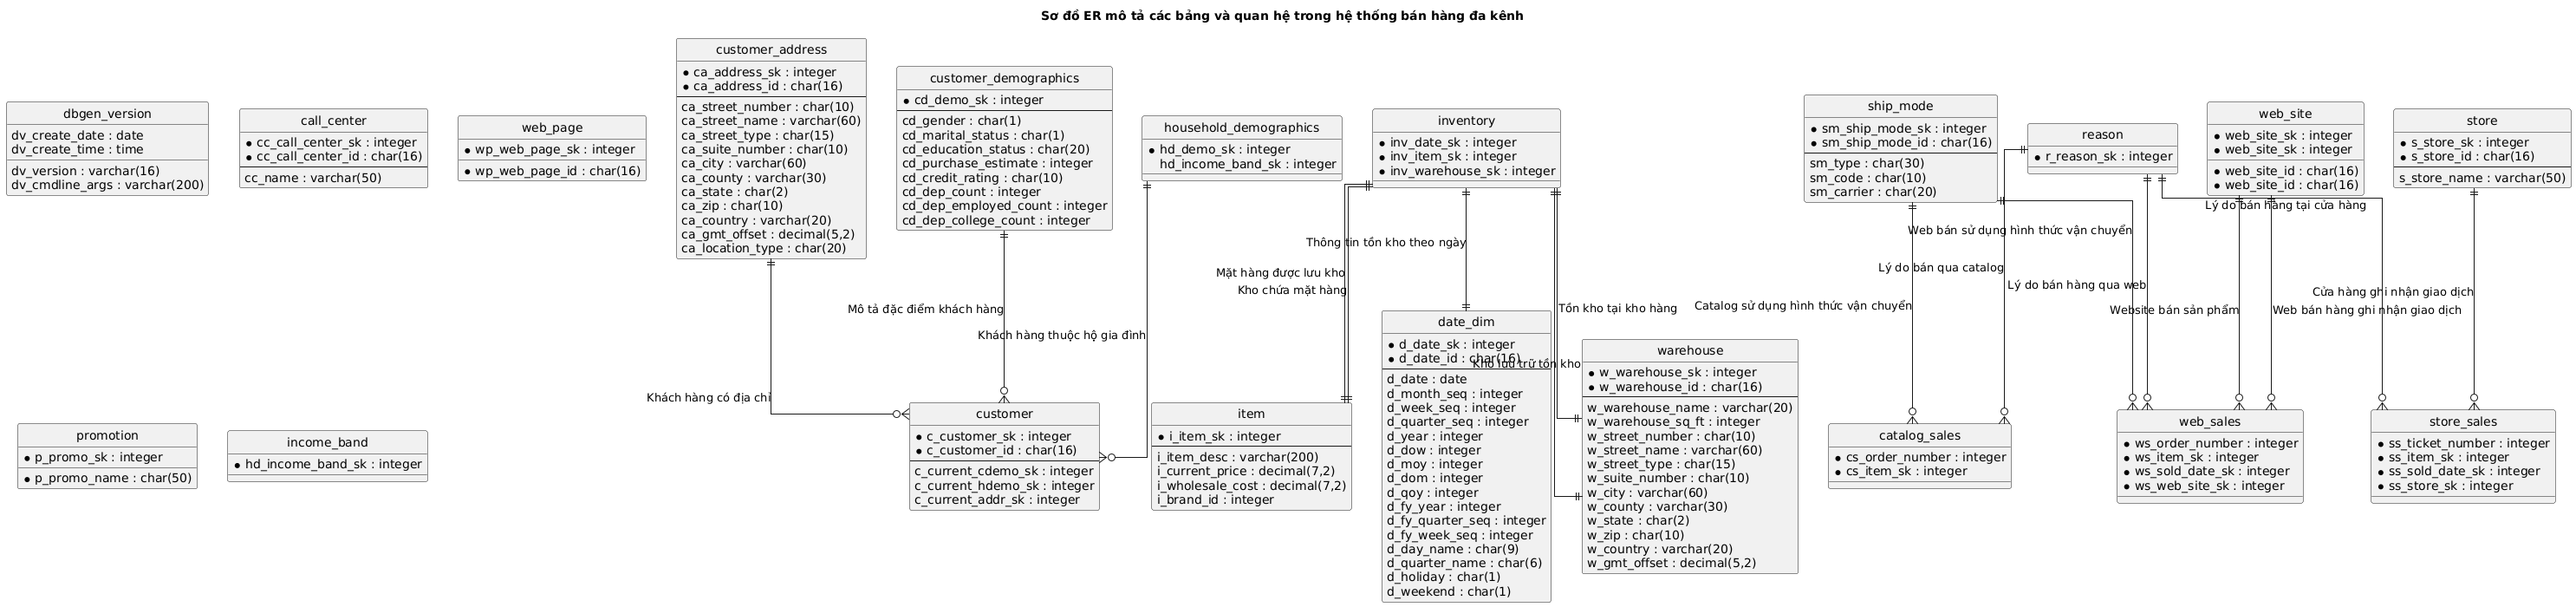

In [1]:
from plantuml import PlantUML
from IPython.display import Image

server = PlantUML(url='http://www.plantuml.com/plantuml/img/')

uml = '''
@startuml
top to bottom direction

title Sơ đồ ER mô tả các bảng và quan hệ trong hệ thống bán hàng đa kênh

hide circle
skinparam linetype ortho

'Phiên bản của cơ sở dữ liệu
entity dbgen_version {
    dv_version : varchar(16)
    dv_create_date : date
    dv_create_time : time
    dv_cmdline_args : varchar(200)
}

'Địa chỉ của khách hàng
entity customer_address {
    * ca_address_sk : integer
    * ca_address_id : char(16)
    --
    ca_street_number : char(10)
    ca_street_name : varchar(60)
    ca_street_type : char(15)
    ca_suite_number : char(10)
    ca_city : varchar(60)
    ca_county : varchar(30)
    ca_state : char(2)
    ca_zip : char(10)
    ca_country : varchar(20)
    ca_gmt_offset : decimal(5,2)
    ca_location_type : char(20)
}

'Thông tin nhân khẩu học khách hàng
entity customer_demographics {
    * cd_demo_sk : integer
    --
    cd_gender : char(1)
    cd_marital_status : char(1)
    cd_education_status : char(20)
    cd_purchase_estimate : integer
    cd_credit_rating : char(10)
    cd_dep_count : integer
    cd_dep_employed_count : integer
    cd_dep_college_count : integer
}

'Thông tin ngày tháng
entity date_dim {
    * d_date_sk : integer
    * d_date_id : char(16)
    --
    d_date : date
    d_month_seq : integer
    d_week_seq : integer
    d_quarter_seq : integer
    d_year : integer
    d_dow : integer
    d_moy : integer
    d_dom : integer
    d_qoy : integer
    d_fy_year : integer
    d_fy_quarter_seq : integer
    d_fy_week_seq : integer
    d_day_name : char(9)
    d_quarter_name : char(6)
    d_holiday : char(1)
    d_weekend : char(1)
}

'Kho hàng
entity warehouse {
    * w_warehouse_sk : integer
    * w_warehouse_id : char(16)
    --
    w_warehouse_name : varchar(20)
    w_warehouse_sq_ft : integer
    w_street_number : char(10)
    w_street_name : varchar(60)
    w_street_type : char(15)
    w_suite_number : char(10)
    w_city : varchar(60)
    w_county : varchar(30)
    w_state : char(2)
    w_zip : char(10)
    w_country : varchar(20)
    w_gmt_offset : decimal(5,2)
}

'Phương thức vận chuyển
entity ship_mode {
    * sm_ship_mode_sk : integer
    * sm_ship_mode_id : char(16)
    --
    sm_type : char(30)
    sm_code : char(10)
    sm_carrier : char(20)
}

'Sản phẩm / mặt hàng
entity item {
    * i_item_sk : integer
    --
    i_item_desc : varchar(200)
    i_current_price : decimal(7,2)
    i_wholesale_cost : decimal(7,2)
    i_brand_id : integer
}

'Cửa hàng
entity store {
    * s_store_sk : integer
    * s_store_id : char(16)
    --
    s_store_name : varchar(50)
}

'Trung tâm chăm sóc khách hàng
entity call_center {
    * cc_call_center_sk : integer
    * cc_call_center_id : char(16)
    --
    cc_name : varchar(50)
}

'Khách hàng
entity customer {
    * c_customer_sk : integer
    * c_customer_id : char(16)
    --
    c_current_cdemo_sk : integer
    c_current_hdemo_sk : integer
    c_current_addr_sk : integer
}

'Tồn kho
entity inventory {
    * inv_date_sk : integer
    * inv_item_sk : integer
    * inv_warehouse_sk : integer
}

'Trang web bán hàng
entity web_site {
    * web_site_sk : integer
    * web_site_id : char(16)
}

'Trang web cụ thể
entity web_page {
    * wp_web_page_sk : integer
    * wp_web_page_id : char(16)
}

'Bán hàng qua catalog
entity catalog_sales {
    * cs_order_number : integer
    * cs_item_sk : integer
}

'Bán hàng tại cửa hàng
entity store_sales {
    * ss_ticket_number : integer
    * ss_item_sk : integer
    * ss_sold_date_sk : integer
    * ss_store_sk : integer
}

'Bán hàng qua web
entity web_sales {
    * ws_order_number : integer
    * ws_item_sk : integer
    * ws_sold_date_sk : integer
    * ws_web_site_sk : integer
}

'Chương trình khuyến mãi
entity promotion {
    * p_promo_sk : integer
    * p_promo_name : char(50)
}

'Nhân khẩu học hộ gia đình
entity household_demographics {
    * hd_demo_sk : integer
    hd_income_band_sk : integer
}

'Khoảng thu nhập
entity income_band {
    * hd_income_band_sk : integer
}

'Lý do mua hàng
entity reason {
    * r_reason_sk : integer
}

'Web site bán hàng
entity web_site {
    * web_site_sk : integer
    * web_site_id : char(16)
}

'--- Các quan hệ (FK constraints) kèm mô tả ---

customer_address ||--o{ customer : "Khách hàng có địa chỉ"
customer_demographics ||--o{ customer : "Mô tả đặc điểm khách hàng"
household_demographics ||--o{ customer : "Khách hàng thuộc hộ gia đình"
store ||--o{ store_sales : "Cửa hàng ghi nhận giao dịch"
web_site ||--o{ web_sales : "Website bán sản phẩm"
inventory ||--|| date_dim : "Thông tin tồn kho theo ngày"
inventory ||--|| warehouse : "Tồn kho tại kho hàng"
item ||--|| inventory : "Mặt hàng được lưu kho"
ship_mode ||--o{ web_sales : "Web bán sử dụng hình thức vận chuyển"
ship_mode ||--o{ catalog_sales : "Catalog sử dụng hình thức vận chuyển"
web_site ||--o{ web_sales : "Web bán hàng ghi nhận giao dịch"
reason ||--o{ store_sales : "Lý do bán hàng tại cửa hàng"
reason ||--o{ web_sales : "Lý do bán hàng qua web"
reason ||--o{ catalog_sales : "Lý do bán qua catalog"
inventory ||--|| item : "Kho chứa mặt hàng"
inventory ||--|| warehouse : "Kho lưu trữ tồn kho"

@enduml
'''

Image(server.processes(uml))